[TOC](../toc.ipynb)

Advanced topics in nonlinear algebra
====================================

- KEYWORDS: scipy.optimize.root, numpy.roots, numpy.polyder, numpy.polyval, numpy.polyint, numpy.poly1d




## Special nonlinear systems - polynomials





Polynomials are a special class of nonlinear algebraic equations that are especially easy to solve. A polynomial is linear in the coefficients in front of the variable. If we consider the following $n^{th}$ order polynomial:

$p_0 x^n + p_1 x^{(n-1)} + ... + p_{n-1} x + p_n = 0$

Let's be specific:

$x^2 + 8x + 16 = 0$

We express this as [1, 8, 16].



In [1]:
import numpy as np
?np.roots



Signature: np.roots(p)
Docstring:
Return the roots of a polynomial with coefficients given in p.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

The values in the rank-1 array `p` are coefficients of a polynomial.
If the length of `p` is n+1 then the polynomial is described by::

  p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]

Parameters
----------
p : array_like
    Rank-1 array of polynomial coefficients.

Returns
-------
out : ndarray
    An array containing the roots of the polynomial.

Raises
------
ValueError
    When `p` cannot be converted to a rank-1 array.

See also
--------
poly : Find the coefficients of a polynomial with a given sequence
       of roots.
polyval : Compute polynomial values.
polyfit : Least squares polynomial fit.
poly1d : A one-dimensiona

In [6]:
p = [1, 8, 16]
r = np.roots(p)
r



array([-4., -4.])

y = (x + 4)^2 = x^2 + 8 * x + 16

In [7]:
r**2 + 8 * r + 16



array([0., 0.])

In [8]:
np.polyval(p, r) # evaluate the polynomial in p at r.

array([0., 0.])

In [10]:
np.roots([1, 0, 1])  # x^2 + 1

array([-0.+1.j,  0.-1.j])

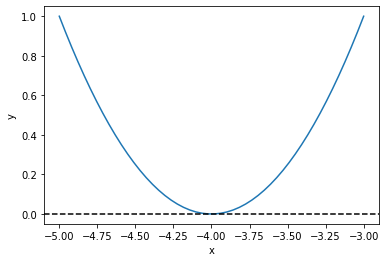

In [13]:
import matplotlib.pyplot as plt

X = np.linspace(-5, -3)
y = X**2 + 8 * X + 16
plt.plot(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, linestyle='--', color='k');



Note we get all the roots. We can check that with the `numpy.polyval` command.





In [12]:
?np.polyval



Signature: np.polyval(p, x)
Docstring:
Evaluate a polynomial at specific values.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

If `p` is of length N, this function returns the value:

    ``p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]``

If `x` is a sequence, then ``p(x)`` is returned for each element of ``x``.
If `x` is another polynomial then the composite polynomial ``p(x(t))``
is returned.

Parameters
----------
p : array_like or poly1d object
   1D array of polynomial coefficients (including coefficients equal
   to zero) from highest degree to the constant term, or an
   instance of poly1d.
x : array_like or poly1d object
   A number, an array of numbers, or an instance of poly1d, at
   which to evaluate `p`.

Returns
-------
values : ndarray or poly1d
   If

In [14]:
np.polyval(p, r)  # Another new command



array([0., 0.])

We can also use this to plot a polynomial.





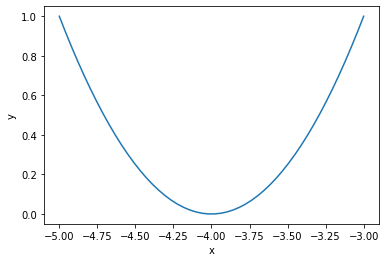

In [15]:
import numpy as np

x = np.linspace(-5, -3)
y = np.polyval(p, x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y");



In [18]:
from scipy.optimize import root


def f(x):
    return np.polyval(p, x)


root(f, -3.01)



    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 37
     qtf: array([-3.55271368e-15])
       r: array([-1.88324354e-07])
  status: 1
 success: True
       x: array([-3.99999996])

Why is this so convenient?





### Cubic equations of state





There are applications of polynomials in thermodynamics. The van der waal equation is a cubic polynomial $f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$, where $a$ and $b$ are constants, $p$ is the pressure, $R$ is the gas constant, $T$ is an absolute temperature and $n$ is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.





In [19]:
# numerical values of the constants
a = 3.49e4
b = 1.45
p = 679.7  # pressure in psi
T = 683  # T in Rankine
n = 1.136  # lb-moles
R = 10.73  # ft^3 * psi / R / lb-mol

ppar = [
    1.0,                           # V**3
    -(p * n * b + n * R * T) / p,  # V**2
    n**2 * a / p,                  # V
    -(n**3) * a * b / p,           # constant, together this defines f(V)

]  
print(np.roots(ppar))



[5.09432376+0.j         4.4006681 +1.43502848j 4.4006681 -1.43502848j]


In [24]:
rr = np.roots(ppar)
(rr[0]).imag, (rr[0]).real  # you can extract the real and imaginary parts of the root out by these attributes



(0.0, 5.0943237645545985)

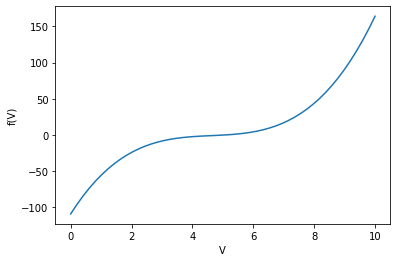

In [25]:
V = np.linspace(0, 10)
plt.plot(V, np.polyval(ppar, V))
plt.xlabel('V')
plt.ylabel('f(V)');

Note that only one root is real (and even then, we have to interpret 0.j as not being imaginary. Also, in a cubic polynomial, there can only be two imaginary roots). In this case that means there is only one phase present.

Remember root? Two of these roots are not accessible in root because they are imaginary.




### Other useful things to remember about polynomials





You can easily get the parameters of the derivative of the polynomial with `numpy.polyder`.





In [26]:
?np.polyder



Signature: np.polyder(p, m=1)
Docstring:
Return the derivative of the specified order of a polynomial.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Parameters
----------
p : poly1d or sequence
    Polynomial to differentiate.
    A sequence is interpreted as polynomial coefficients, see `poly1d`.
m : int, optional
    Order of differentiation (default: 1)

Returns
-------
der : poly1d
    A new polynomial representing the derivative.

See Also
--------
polyint : Anti-derivative of a polynomial.
poly1d : Class for one-dimensional polynomials.

Examples
--------
The derivative of the polynomial :math:`x^3 + x^2 + x^1 + 1` is:

>>> p = np.poly1d([1,1,1,1])
>>> p2 = np.polyder(p)
>>> p2
poly1d([3, 2, 1])

which evaluates to:

>>> p2(2.)
17.0

We can verify this, approximating t

$y = x^2 + 8x + 16$


$y'(x) = 2x + 8$



In [27]:
p = [1, 8, 16]

pd = np.polyder(p)  # New command
pd



array([2, 8])

You can use these with `numpy.polyval` to compute the derivative at different points. Note, this is an *analytical* derivative! No approximation necessary.





In [28]:
np.polyval(pd, np.linspace(-5, -3))



array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])

You can also get the coefficients of the integral of the polynomial. The integration constant is assumed to be 0 by default.





In [29]:
?np.polyint



Signature: np.polyint(p, m=1, k=None)
Docstring:
Return an antiderivative (indefinite integral) of a polynomial.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

The returned order `m` antiderivative `P` of polynomial `p` satisfies
:math:`\frac{d^m}{dx^m}P(x) = p(x)` and is defined up to `m - 1`
integration constants `k`. The constants determine the low-order
polynomial part

.. math:: \frac{k_{m-1}}{0!} x^0 + \ldots + \frac{k_0}{(m-1)!}x^{m-1}

of `P` so that :math:`P^{(j)}(0) = k_{m-j-1}`.

Parameters
----------
p : array_like or poly1d
    Polynomial to integrate.
    A sequence is interpreted as polynomial coefficients, see `poly1d`.
m : int, optional
    Order of the antiderivative. (Default: 1)
k : list of `m` scalars or scalar, optional
    Integration constants. They ar

In [30]:
pint = np.polyint(p)  # new command
pint



array([ 0.33333333,  4.        , 16.        ,  0.        ])

You can use this to compute definite integrals, e.g. from x=1 to x=2:





In [31]:
np.polyval(pint, 2) - np.polyval(pint, 1)



30.33333333333334

In [32]:
from scipy.integrate import quad


def integrand(x):
    return x**2 + 8 * x + 16


quad(integrand, 1, 2)



(30.333333333333332, 3.367676508029641e-13)

In [33]:
p



[1, 8, 16]

In [38]:
X = np.linspace(1, 2)
y = X**2 + 8 * X + 16
from scipy.integrate import simps

simps(y, X)



30.333334749976625

**exercise** Use another method to confirm the result above.

Finally, the syntax `np.polyval(pint, 2)` can be a little tedious. You can create a function with `numpy.poly1d` using the array of coefficients. Conveniently, you can use the function in the roots, polyder and polyint commands!





In [39]:
?np.poly1d



Init signature: np.poly1d(c_or_r, r=False, variable=None)
Docstring:     
A one-dimensional polynomial class.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

A convenience class, used to encapsulate "natural" operations on
polynomials so that said operations may take on their customary
form in code (see Examples).

Parameters
----------
c_or_r : array_like
    The polynomial's coefficients, in decreasing powers, or if
    the value of the second parameter is True, the polynomial's
    roots (values where the polynomial evaluates to 0).  For example,
    ``poly1d([1, 2, 3])`` returns an object that represents
    :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
    one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
r : bool, optional
    If True

In [40]:
p = np.poly1d(pint)
p(2) - p(1)



30.33333333333334

In [41]:
p

poly1d([ 0.33333333,  4.        , 16.        ,  0.        ])

In [42]:
np.roots(p)



array([-6.+3.46410162j, -6.-3.46410162j,  0.+0.j        ])

In [ ]:
?p



In [43]:
print(p)



        3     2
0.3333 x + 4 x + 16 x


In [44]:
p.r  # shorthand for roots



array([-6.+3.46410162j, -6.-3.46410162j,  0.+0.j        ])

In [45]:
[
    root.real for root in p.r if np.abs(root.imag) <= 1e-12
]  # extract out only the real part of the real roots.



[0.0]

In [48]:
for root in p.r:
    if np.abs(root.imag) <= 1e-12:
        print(root.real)
    

0.0


In [49]:
with np.printoptions(suppress=True):  # show very small numbers as 0
    print(p(p.r))



[0.+0.j 0.-0.j 0.+0.j]


In [50]:
p.coefficients



array([ 0.33333333,  4.        , 16.        ,  0.        ])

In [51]:
p.order



3

In [52]:
?p

Signature:   p(val)
Type:        poly1d
String form:
        3     2
0.3333 x + 4 x + 16 x
Length:      3
File:        /opt/tljh/user/lib/python3.9/site-packages/numpy/__init__.py
Docstring:  
A one-dimensional polynomial class.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

A convenience class, used to encapsulate "natural" operations on
polynomials so that said operations may take on their customary
form in code (see Examples).

Parameters
----------
c_or_r : array_like
    The polynomial's coefficients, in decreasing powers, or if
    the value of the second parameter is True, the polynomial's
    roots (values where the polynomial evaluates to 0).  For example,
    ``poly1d([1, 2, 3])`` returns an object that represents
    :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3]

## Systems of nonlinear equations





```{note}
There is also `scipy.optimize.fsolve` which can also be used to solve nonlinear equations. This is an older function, and `root` is preferred for new code.
```



Analogously to systems of ordinary differential equations, with systems of nonlinear equations we define functions that will return a zero for each equation in the system. Then we have to pass an initial guess for each variable to fsolve, and it will return an array of values, one for each variable.

It is considerably more difficult to visualize systems of nonlinear equations. With two equations and two unknowns it is sometimes easy to plot solutions, but not always.

\begin{align}
y &=& x^2 \\
y &=& 8 - x^2
\end{align}

One approach to visualizing this is to plot the two curves.





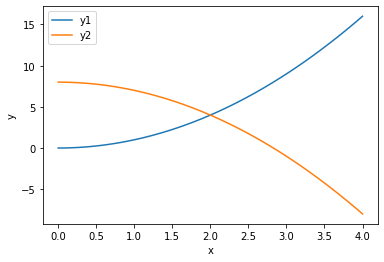

In [68]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4)

y1 = x**2
y2 = 8 - x**2

plt.plot(x, y1, x, y2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["y1", "y2"]);



You can see that on this domain, there is one place where the two curves intersect near the point (2, 5), which is a solution point. At this point there is one (x, y) pair that is a solution to *both* equations.



In [69]:
from scipy.optimize import root


def objective(X):
    x, y = X
    z1 = y - x**2
    z2 = y - 8 + x**2
    return np.array([z1, z2])


guess = [2, 3.6]
objective(guess)



array([-0.4, -0.4])

In [70]:
guess = [2, 5.6]
ans = root(objective, guess)  

ans



    fjac: array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([ 8.27180609e-25, -9.62863094e-09])
       r: array([ 5.65685429e+00, -1.10752852e-24, -1.41421356e+00])
  status: 1
 success: True
       x: array([2., 4.])

In [71]:
sol = root(objective, guess)  # we unpack the two parts of the solution into x and y
xs, ys = sol.x
xs, ys



(2.0, 4.0)

In [72]:
[
    objective((xs, ys)),  # tuple
    objective([xs, ys]),  # list
    # use an array
    objective(np.array([xs, ys])),
]  # three equivalent ways to call the objective function



[array([0., 0.]), array([0., 0.]), array([0., 0.])]

In [73]:
objective(ans.x)



array([0., 0.])

In [74]:
objective(guess)



array([1.6, 1.6])

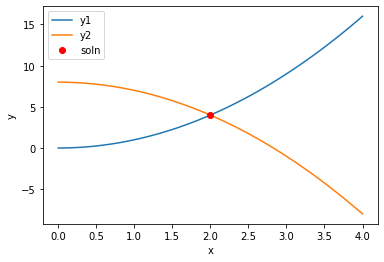

In [77]:
# It is always wise to visualize the solution!
plt.plot(x, y1, x, y2)
plt.plot(*sol.x, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["y1", "y2", "soln"]);


## A harder example



It is not always easy to solve for one variable in terms of the other though. In that case, we can resort to an alternate graphical approach where we evaluate the objective function over a range of the variables, and look for regions where they overlap.

Consider the solution to these equations (adapted from [https://www.mathworks.com/help/optim/ug/fsolve.html](https://www.mathworks.com/help/optim/ug/fsolve.html)):

$e^{-e^{-(x_1 + x_2)}} = x_2 (1 + x_1^2)$

and

$x_1 \cos(x_2) + x_2 \sin(x_1) = 1/2$

It is not possible to solve either one for one variable in terms of the other. So instead, we will compute the objective function for a range of $x_1, x_2$ values, and then use a contour plot of each equation to see where there might be a solution.

The key to this visualization is where we draw the contours. A good choice is to highlight only the part of the solutions that bracket zero. Then we can see where they intersect, because there is probably a solution in that neighborhood.





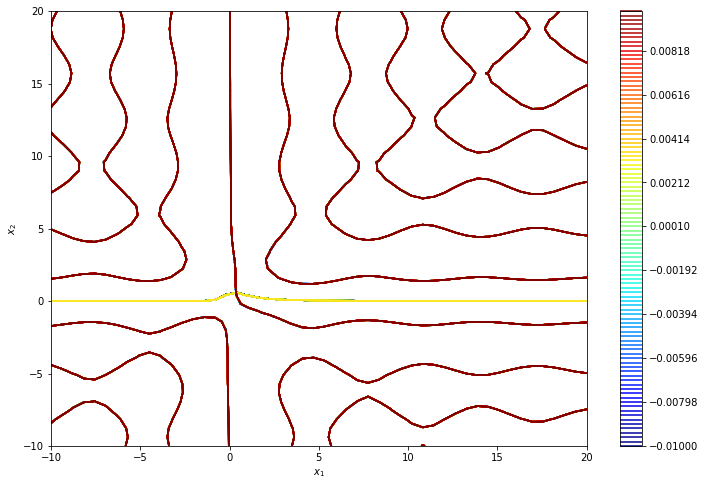

In [84]:
import numpy as np


def objective(X):
    x1, x2 = X
    z1 = np.exp(-np.exp(-(x1 + x2))) - x2 * (1 + x1**2)
    z2 = x1 * np.cos(x2) + x2 * np.sin(x1) - 0.5
    return np.array([z1, z2])


x1 = np.linspace(-10, 20)
x2 = np.linspace(-10, 20)

X1, X2 = np.meshgrid(x1, x2)

Z1, Z2 = objective([X1, X2])
plt.figure(figsize=(12, 8))
plt.contour(X1, X2, Z1, levels=np.linspace(-0.01, 0.01, 100))
plt.contour(X1, X2, Z2, levels=np.linspace(-0.01, 0.01, 100), cmap="jet")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar();



In [87]:
objective([0.4, 0.6])  # shows that the objective function is approximately zero



array([-0.00379937,  0.06378525])

There is an intersection near $x_1=0.4$, and $x_2 = 0.6$. We can use that as an initial guess.



In [91]:
from scipy.optimize import root

ans = root(
    objective, [50, 5]
)  # note we do not need ans, because ans will have two values in it.
ans, objective(ans.x)



(    fjac: array([[-0.26241211, -0.9649559 ],
        [ 0.9649559 , -0.26241211]])
      fun: array([1.21791466e-13, 2.77555756e-14])
  message: 'The solution converged.'
     nfev: 24
      qtf: array([ 5.59215101e-11, -1.04694446e-10])
        r: array([-1.57859415,  0.01930081, -0.74444205])
   status: 1
  success: True
        x: array([0.35324662, 0.60608174]),
 array([1.21791466e-13, 2.77555756e-14]))

This is a zoom in on the solution space.

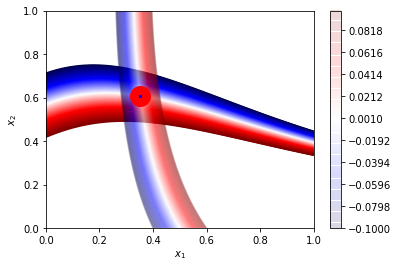

In [92]:
x1 = np.linspace(0, 1)
x2 = np.linspace(0, 1)

X1, X2 = np.meshgrid(x1, x2)
Z1, Z2 = objective([X1, X2])
plt.contour(X1, X2, Z1, levels=np.linspace(-0.1, 0.1, 100), cmap="seismic")
plt.contour(
    X1, X2, Z2, levels=np.linspace(-0.1, 0.1, 100), cmap="seismic", alpha=0.2
)  # set a colormap
plt.plot(*ans.x, "ro", ms=20)
plt.plot(*ans.x, "bs", ms=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar();



This shows the solution, and that the objective is practically equal to zero at that point.

You can see that trying to do this in more than 2 dimensions can quickly get difficult to visualize!





In [98]:
# show that we only get one solution by brute force iteration over all the grid points
I, J = X1.shape
solns = []
counter = 0
for i in range(I):
    for j in range(J):
        x1, x2 = X1[i, j], X2[i, j]
        ans = root(objective, [x1, x2])
        solns += [ans.x]
        counter += 1

solns = np.array(solns)
print(f'Solved {counter} times')
(np.mean(solns, axis=0), np.std(solns, axis=0))



Solved 2500 times


(array([0.35324662, 0.60608174]), array([6.13079215e-12, 1.45204411e-11]))

In [96]:
X1.shape

(50, 50)

In [95]:
solns.shape



(2500, 2)

In [100]:
gb = (50**10 
 * 16 # bytes per number
 / 1024 # to kb
 / 1024  # to mb
 / 1024) # to gb 
# Estimate of memory required to store 50**10 floats in an array

print(f'{gb} GB needed to store 5e11 floats')



1455191522.8366852 GB needed to store 5e11 floats


## Summary





-   We learned about a special class of nonlinear functions that are polynomials, and a series of useful functions to manipulate them.

-   We learned that you can use root to find solutions to coupled non-linear algebraic equations.

-   Next time, we will apply this to solving a nonlinear boundary value differential equation.



```{note}
Technically the polynomial functions here are not preferred anymore (https://numpy.org/doc/stable/reference/routines.polynomials.html). Instead, there is a new `numpy.polynomial` package that is preferred. This new package is more complete, and supposed to be more convenient. However, it introduces some surprising conventions, especially in polynomial fitting, that make it inconvenient in my opinion. That is why I do not recommend them here as the first entrypoint in using polynomials.

```



In [101]:
from f22_06623 import MCQ
MCQ(lecture='08_nla_2')



<IPython.core.display.Javascript object>